In [1]:
import pandas as pd
from top2vec import Top2Vec

In [2]:
all_tweets=pd.read_csv("original_tweets_cleaned.csv")
delhi_news=pd.read_csv("city.delhi-corona-news.txt",sep="  ",header=None,names=["publish_date","news"])
delhi_news.index=pd.to_datetime(pd.Series([str(i)[:4]+"-"+str(i)[4:6]+"-"+str(i)[6:] for i in delhi_news.publish_date.values]))
delhi_news.drop("publish_date",axis=1,inplace=True)

C:\Users\akshe\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,4,5,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\akshe\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [3]:
location=[i for i in [str(i) for i in all_tweets.location.unique()] if ("ncr" in i.lower()) or ("delhi" in i.lower())]
time=[]
full_text=[]
for i in range(0,len(all_tweets.index)):
    if all_tweets.location.values[i] in location:
        time.append(all_tweets.created_at.values[i])
        full_text.append(all_tweets.full_text.values[i])
delhi=pd.DataFrame()
delhi["Timeline"]=time
delhi["Text"]=full_text
delhi=delhi.sort_values("Timeline")
delhi.index=pd.to_datetime(delhi.Timeline)
delhi_tweets=delhi.drop("Timeline",axis=1)

In [4]:
delhi_tweets=delhi_tweets.drop_duplicates()

In [5]:
march_delhi_news=list(delhi_news[delhi_news.index.month==3].news.values)

In [6]:
march_delhi_tweets=list(delhi_tweets[delhi_tweets.index.month==3].Text.values)

In [7]:
march_pooled=march_delhi_news+march_delhi_tweets
march_pooled=[str(i) for i in march_pooled]
#first 192 are news and  rest is news after that\

In [8]:
model=Top2Vec(march_pooled,speed="deep-learn",workers=10,verbose=True)

2020-10-03 21:56:45,959 - top2vec - INFO - Pre-processing documents for training
2020-10-03 21:56:46,759 - top2vec - INFO - Creating joint document/word embedding
2020-10-03 22:05:11,511 - top2vec - INFO - Creating lower dimension embedding of documents
2020-10-03 22:05:31,055 - top2vec - INFO - Finding dense areas of documents
2020-10-03 22:05:33,491 - top2vec - INFO - Finding topics


In [9]:
model.get_num_topics()

147

In [11]:
model.get_topics()

(array([['rises', 'deaths', 'cases', ..., 'died', 'more', 'two'],
        ['her', 'religion', 'she', ..., 'dont', 'friend', 'hi'],
        ['share', 'link', 'whatsapp', ..., 'defeat', 'love', 'society'],
        ...,
        ['happy', 'free', 'day', ..., 'article', 'care', 'vardhan'],
        ['donate', 'rises', 'takes', ..., 'protection', 'latest', 'ncr'],
        ['though', 'company', 'shows', ..., 'finally', 'thought',
         'saying']], dtype='<U14'),
 array([[ 0.4691,  0.4048,  0.3899, ...,  0.1275,  0.1256,  0.123 ],
        [ 0.2251,  0.1954,  0.1866, ...,  0.0879,  0.0878,  0.0874],
        [ 0.1328,  0.1307,  0.115 , ...,  0.0668,  0.0668,  0.0665],
        ...,
        [ 0.2869,  0.1745,  0.1692, ...,  0.0948,  0.0935,  0.0931],
        [-0.0257, -0.0268, -0.0282, ..., -0.0678, -0.0681, -0.0698],
        [-0.0591, -0.0743, -0.0745, ..., -0.1233, -0.1235, -0.1237]]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18

In [14]:
march_delhi_news[1]

'Coronavirus in Delhi: Five children among 112 isolated at ITBP facility'

In [15]:
model.search_documents_by_documents(doc_ids=[1],num_docs=50)

(array(["16 at ITBP's Delhi quarantine facility test positive for COVID-19",
        'Air India passenger among 118 on board tests positive for COVID-19',
        'Wow this is really commendable. Jammu kashmir police deserves compliments. Quarantine facility provided by J&amp;K police is unprecedented. to J&amp;K police.',
        '9-Month-Old Among 3 Children Of Family Who Tested COVID-19+ In Bengal',
        'Elderly woman talks to husband through glass panes at coronavirus facility',
        'There are now seven known coronaviruses that are transmissible among humans.',
        'Ancient vaccine for Covid-19',
        "First positive case of among 's U.S employees.",
        '21 Italian tourists, 3 Indian tour operators sent to quarantine facility in Delhi for suspected exposure: Sources. (PTI)',
        'DM orders private hospitals to set aside 10% beds for patients',
        'All 112 evacuees from Wuhan tested negative for at ITBP quarantine facility',
        'A National at ITBP C

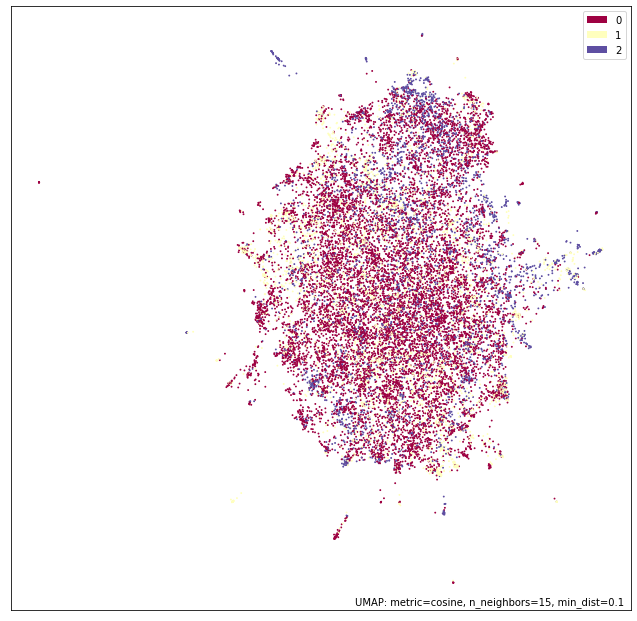

In [20]:
import umap.plot
umap_model = umap.UMAP(n_neighbors=15,n_components=2,metric='cosine').fit(model.model.docvecs.vectors_docs)
umap.plot.points(umap_model,model.doc_top,)